In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


In [2]:
# Load data
file = 'converted_datatypes.csv'
df = pd.read_csv(file)
df.head()

,Company Name,Ship Date,City,State,Shipping Service,Created Date,Weight,Item/Bottle Count
0,1,43952.87139,1555,34,5,43940.85348,10.5,3
1,1,43952.87149,5113,44,1,43943.52123,20.2,6
2,1,43952.87149,1341,5,9,43945.43794,20.2,6
3,1,43952.87148,4881,4,4,43945.60456,10.5,3
4,1,43952.87148,4984,44,1,43947.43795,39.0,12


## Predict 'Item/Bottle Count' and 'Weight'
#### Reference: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html#sphx-glr-auto-examples-tree-plot-tree-regression-multioutput-py

In [3]:
X = df.drop(columns=['Weight','Item/Bottle Count'], axis=1).values
y = df[['Weight', 'Item/Bottle Count']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# Fit regression models
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

DecisionTreeRegressor(max_depth=8)

In [6]:
y_pred1 = regr_1.predict(X_test)
y_pred2 = regr_2.predict(X_test)
y_pred3 = regr_3.predict(X_test)

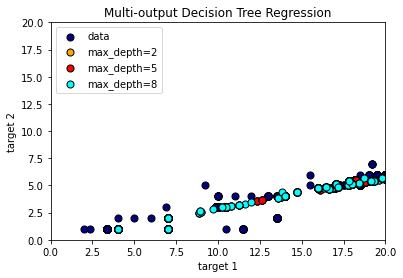

In [7]:
# Plot the results
plt.figure()
s = 50

# Data
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s, edgecolor="black", label="data")

# Prediction Max Depth 2
plt.scatter(
    y_pred1[:,0], y_pred1[:,1], c="orange", s=s, edgecolor="black", label="max_depth=2"
)

# Prediction Max Depth 5
plt.scatter(y_pred2[:,0], y_pred2[:,1], c="red", s=s, edgecolor="black", label="max_depth=5")

# Prediction Max Depth 8
plt.scatter(
    y_pred3[:,0], y_pred3[:,1],
    c="cyan", s=s, edgecolor="black", label="max_depth=8",
)

plt.xlim([0, 20])
plt.ylim([0, 20])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
plt.legend(loc="upper left")
plt.show()

In [8]:
# print(accuracy(y_test[:,0], y_pred3[:,0]))

print("Score Max Depth=2: ", regr_1.score(X, y))
print("Score Max Depth=5: ", regr_2.score(X, y))
print("Score Max Depth=8: ", regr_3.score(X, y))

Score Max Depth=2:  0.5010769195286005
Score Max Depth=5:  0.5157538678720781
Score Max Depth=8:  0.5437628293333148
